In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [28]:
# Load the image and convert it to grayscale
input_image = cv2.imread('check.jpg')
gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)


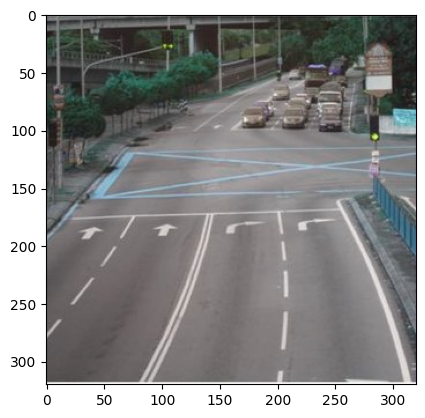

In [29]:
plt.imshow(input_image)

In [30]:
# Perform edge detection
edge_image = cv2.Canny(gray, 50, 150, apertureSize=3)

# Apply the Hough Transform
detected_lines = cv2.HoughLines(edge_image, 1, np.pi / 180, 200)


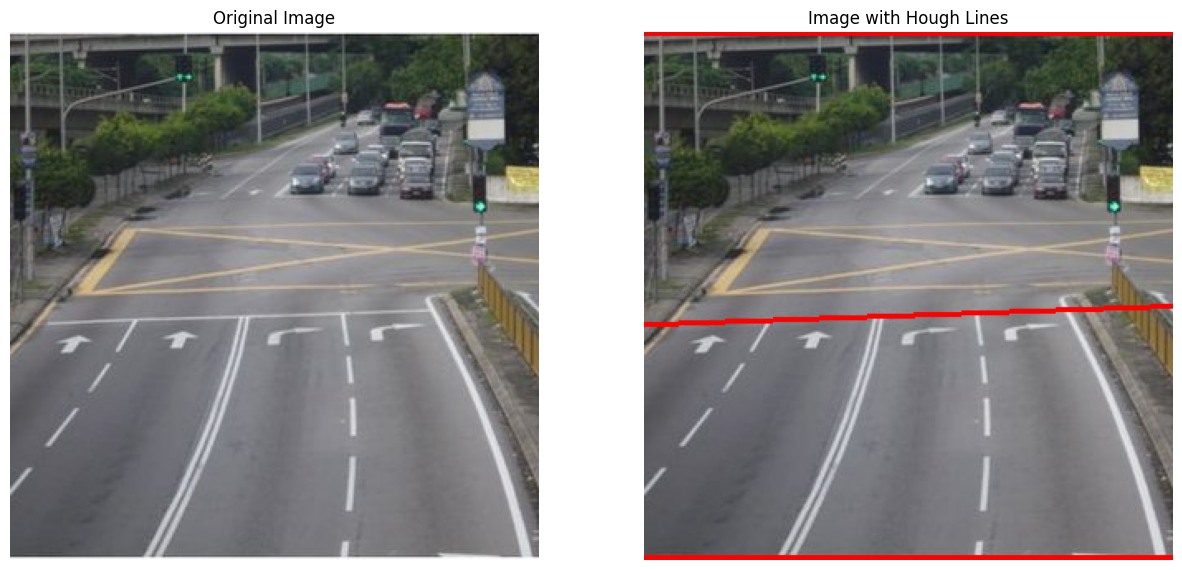

In [32]:

# Draw the detected lines on the image
output_image = input_image.copy()
for line in detected_lines:
    for rho, theta in line:
        cos_theta = np.cos(theta)
        sin_theta = np.sin(theta)
        x_0 = cos_theta * rho
        y_0 = sin_theta * rho
        x_1 = int(x_0 + 1000 * (-sin_theta))
        y_1 = int(y_0 + 1000 * (cos_theta))
        x_2 = int(x_0 - 1000 * (-sin_theta))
        y_2 = int(y_0 - 1000 * (cos_theta))

        cv2.line(output_image, (x_1, y_1), (x_2, y_2), (0, 0, 255), 2)

# Convert the processed image from BGR to RGB
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Convert the original image from BGR to RGB
original_image_rgb = cv2.cvtColor(cv2.imread('check.jpg'), cv2.COLOR_BGR2RGB)

# Display original and output images
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Image with Hough Lines')
plt.imshow(output_image_rgb)
plt.axis('off')

plt.show()